In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("../../results_old/coverage_crpv.csv")
df2 = pd.read_csv("../../results_summary/dcv_coverage.csv")

df = pd.concat([df, df2])
df['genotype']=df['sample'].str.split("_").str[0]
df['passage']=df['sample'].str.split("_").str[1].str.split('p').str[1].astype(float)
df['replicate']=df['sample'].str.split("_").str[2]

In [48]:
df = df[df['genotype']!='parental']

In [49]:
df['id'] =  df['genotype'] + '_' + df['replicate']

/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1200: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` i

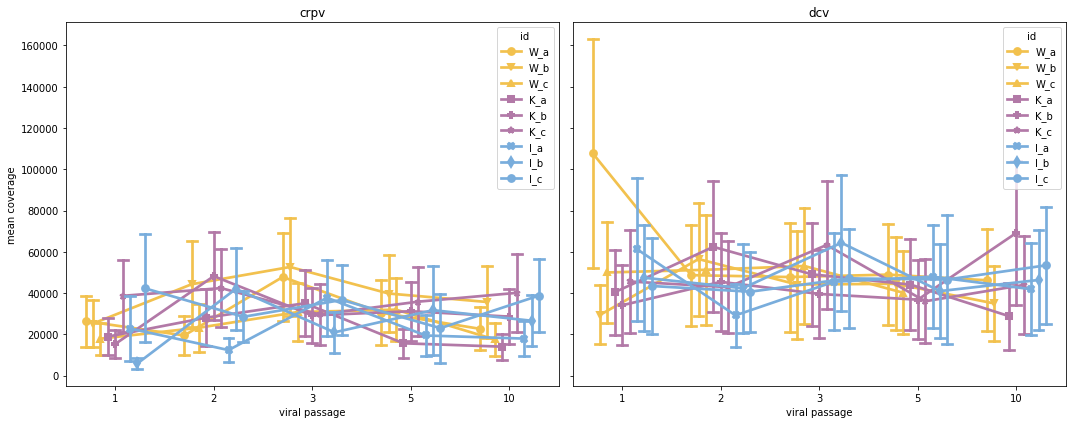

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(df['genome'].unique()), figsize=(15, 6), sharey=True)

for ax, (genome, data) in zip(axes, df.groupby('genome')):
    sns.pointplot(
        data=data,
        x='passage',
        y='coverage',
        hue='id',
        palette=sample_palette,
        dodge=0.6,
        errorbar='sd',      # For seaborn >= v0.12
        capsize=0.1,        # This adds the caps!
        ax=ax,
        markers=[markers_dict.get(s, 'o') for s in sample_list]
    )
    ax.set_title(genome)
    ax.set_xlabel('viral passage')
    
axes[0].set_ylabel('mean coverage')
plt.tight_layout()
plt.savefig("/Users/lfuhrmann/Downloads/coverage.pdf")
plt.show()
